In [62]:
import os
import sys
import pathlib
import pickle
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib import colormaps
from matplotlib.colors import colorConverter, ListedColormap
%matplotlib inline 
import seaborn as sns

import numpy as np
import pandas as pd

from IPython.display import clear_output
import math
import re

In [12]:
def heatmap_colormap_1():
    mapping = colormaps['viridis']
    newcolors = mapping(np.linspace(0, 1, 256))
    newcolors[:13, :] = np.array(colorConverter.to_rgba('forestgreen'))
    newcolors[13:, :] = np.array(colorConverter.to_rgba('tomato'))
    return ListedColormap(newcolors)

def heatmap(df, title, savefig=""):
    # Plots and labels
    h = math.ceil(max(len(df.index)*5/25, 2))
    fig, ax = plt.subplots(figsize=(8, h))
    sns.heatmap(df, vmin = 0, vmax = 1 ,cmap = heatmap_colormap_1())
    ax.set_xticks(np.arange(0.5, 31.5, 5))
#     ax.set_yticks(np.arange(0.5, len(ids)+0.5, 1))
    ax.set_xticklabels(np.arange(0, 31, 5), rotation=0)
#     ax.set_yticklabels(ids, fontsize=8)
    ax.set_ylabel('ID')
    ax.set_xlabel('Time Delay (min)')
    ax.set_title(title)
    plt.tight_layout()
#     if not savefig == "":
#         plt.savefig(f"graphs/PCMCI+ heatmap/{savefig}", dpi=300)
    plt.show()

In [83]:
def sort_key(index_value):
    print(index_value[7:-1])
    return index_value[7:-1]

def loadPCMCI(path):
    files = [f[:-7] for f in os.listdir(path)]
    df = pd.DataFrame()
    
    for id in list(files):
        file = open(f"{path}/{id}.pickle", "rb")
        result = pickle.load(file)
        df = pd.concat([df, pd.DataFrame(result["p_matrix"][1, 0, :], columns=[id]).T])
        file.close()
    
    df = df.loc[sorted(df.index, key=lambda x: x[8:-1])]
    return df

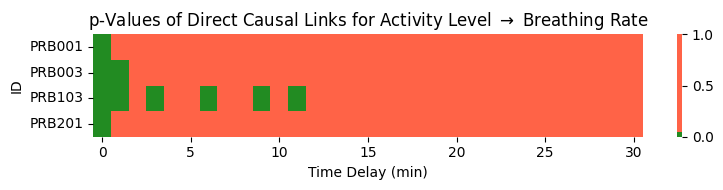

In [86]:
data_path = "D:/ProgramData/Jupyter Notebook/UG4/results/NHS/PCMCI+/r1t30/wls_parcorr/w15"
heatmap(loadPCMCI(data_path), "p-Values of Direct Causal Links for Activity Level $\\rightarrow$ Breathing Rate")

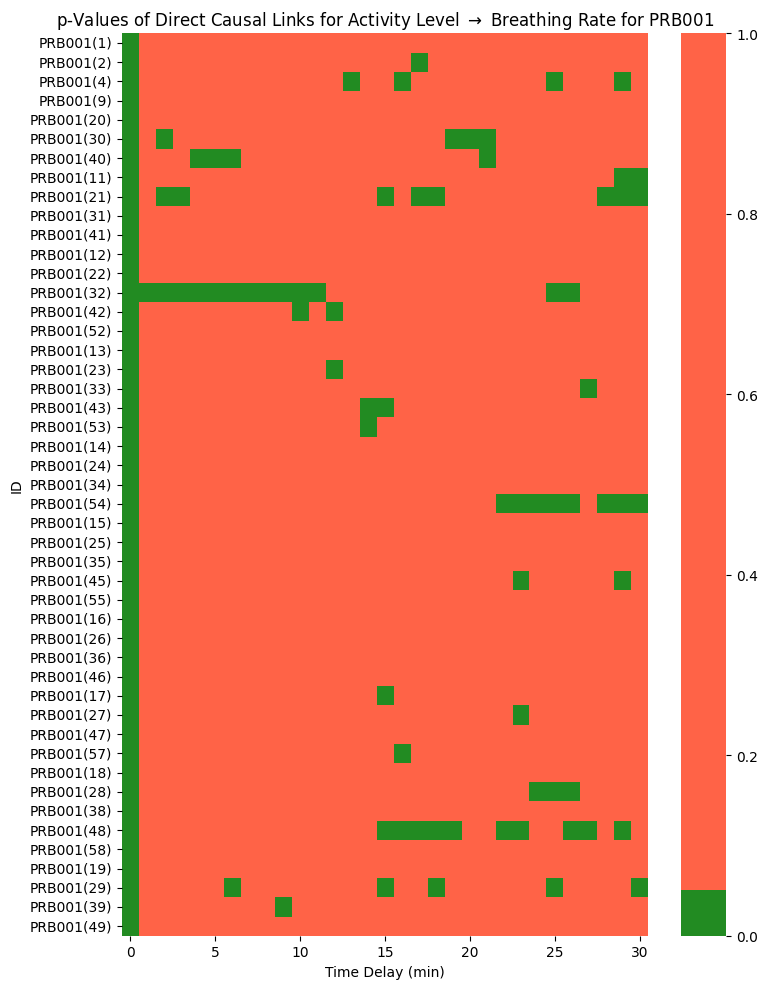

In [89]:
data_path = "D:/ProgramData/Jupyter Notebook/UG4/results/NHS/PCMCI+/r1t30/wls_parcorr/PRB001/w4"
heatmap(loadPCMCI(data_path), "p-Values of Direct Causal Links for Activity Level $\\rightarrow$ Breathing Rate for PRB001")

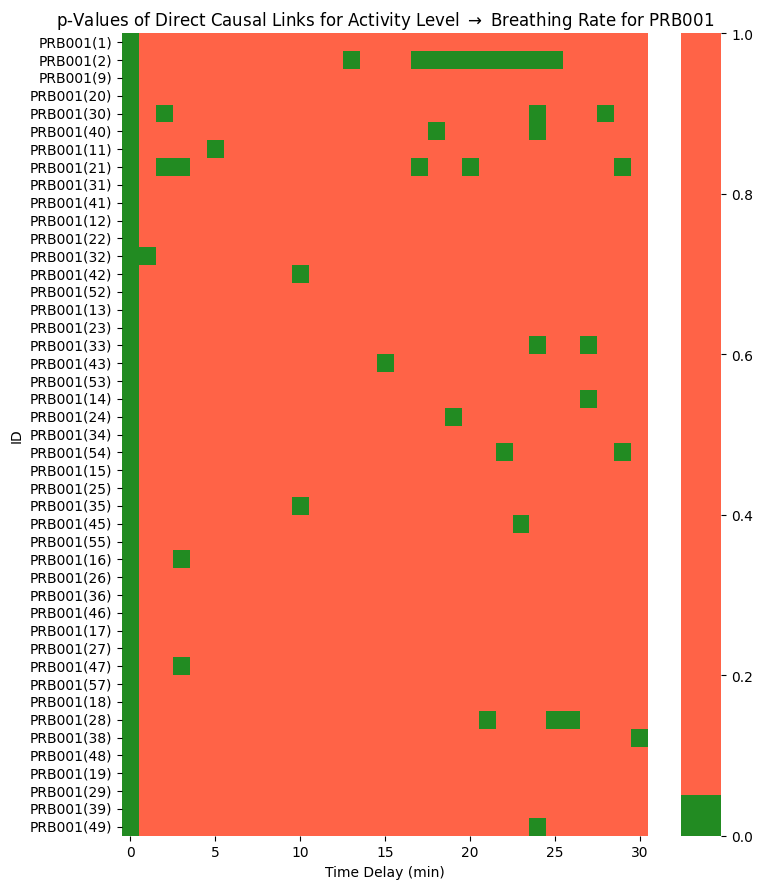

In [90]:
data_path = "D:/ProgramData/Jupyter Notebook/UG4/results/NHS/PCMCI+/r1t30/wls_parcorr/PRB001/w15"
heatmap(loadPCMCI(data_path), "p-Values of Direct Causal Links for Activity Level $\\rightarrow$ Breathing Rate for PRB001")

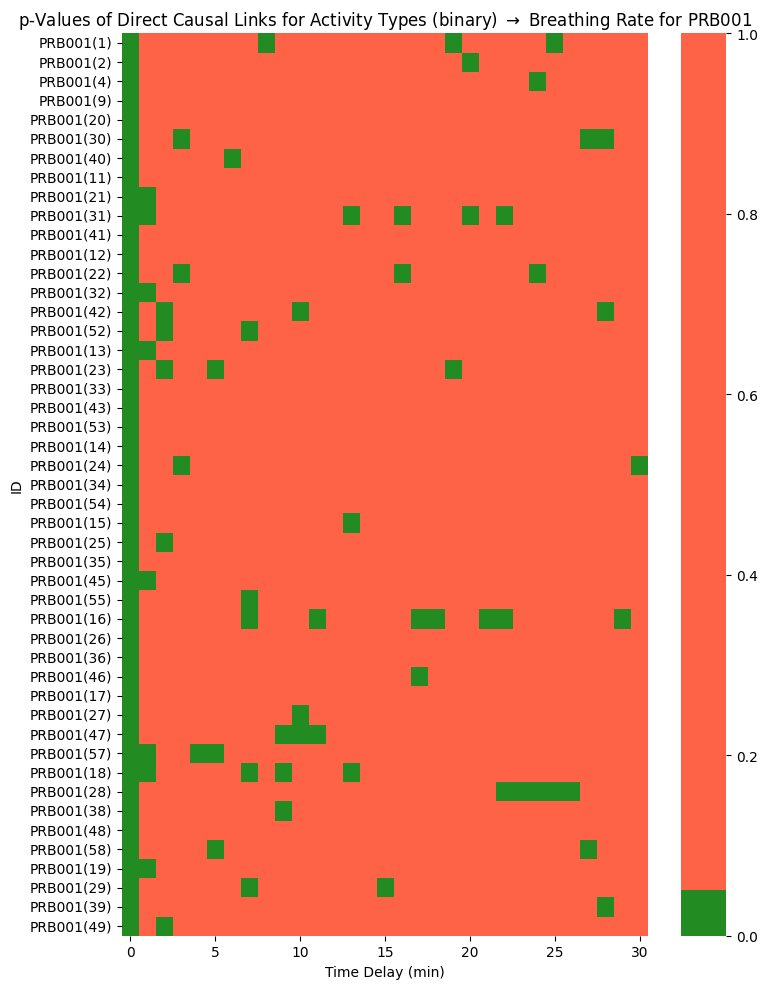

In [85]:
data_path = "D:/ProgramData/Jupyter Notebook/UG4/results/NHS/PCMCI+/r1t30/regression_CI/PRB001"
heatmap(loadPCMCI(data_path), "p-Values of Direct Causal Links for Activity Types (binary) $\\rightarrow$ Breathing Rate for PRB001")

In [ ]:
data_path = "D:/ProgramData/Jupyter Notebook/UG4/results/NHS/PCMCI+/r1t30/regression_CI/PRB001"
heatmap(loadPCMCI(data_path), "p-Values of Direct Causal Links for Activity Types (binary) $\\rightarrow$ Breathing Rate for PRB001")
df_pm_br["ncl"] = (df_pm_br < 0.05).sum(axis=1)
df_pm_br.sort_values(by=["ncl"], inplace=True)